# Machine Learning project using zomato dataset
### In this project which i have done listed below

1. Data Cleaning
  1. Missing values
  2. Dealing with Data type
  3. Removing Special Character which present in my numerical Data

2. Analaysize Restutant columns.
  1. Based on Restutant,which is most voted resturant
  2. which resturant have online survice
  3. Top 5 most voted resturant
  4. Top 5 cheapest resturant
  5. Using Budget column Decide our resturant using filter

3. Geographical Ananlysis using geocode.
4. word clouding using review column.  
5. Define Traget columns using Rate column
6. Distinguish Categorical and numerical feature.
7. Feature Engeneering.
  1. One hot encoding 
  2. label encoding

8. seprate data into train and test.
9. models
  1. Random Forest Classifier
  2. Gaussian Naive Bayes
  3. KNN classifier
  4. Decision Tree Classifier
  5. Logistic Regression
10. Comparing models



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Dealing with Missing Values

In [8]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
df['rate'].isnull().sum()/len(df)*100

15.033741322969234

In [10]:
for feature in feature_na:
  print('{} has {}% missing values'.format(feature , np.round(df[feature].isnull().sum()/len(df)*100 , 4)))

rate has 15.0337% missing values
phone has 2.3358% missing values
location has 0.0406% missing values
rest_type has 0.4389% missing values
dish_liked has 54.2916% missing values
cuisines has 0.087% missing values
approx_cost(for two people) has 0.669% missing values


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [12]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [13]:
df[df['approx_cost(for two people)'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,NaN,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


# Removing Special Character

In [14]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [15]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',' , ''))

In [16]:
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [17]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [18]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [19]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [20]:
df['rate'].dtype

dtype('O')

In [21]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
df['rate'].isnull().sum()

7775

In [23]:
df['rate'][0].split('/')[0]

'4.1'

In [24]:
def split(x):
  return x.split('/')[0]

In [25]:
df['rate'] = df['rate'].astype(str).apply(split)

In [26]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [27]:
df['rate'].replace('-' ,0 , inplace =True)
df['rate'].replace('NEW' ,0 , inplace =True)

In [28]:
df['rate'] = df['rate'].astype(float)

In [29]:
df['rate'].dtype

dtype('float64')

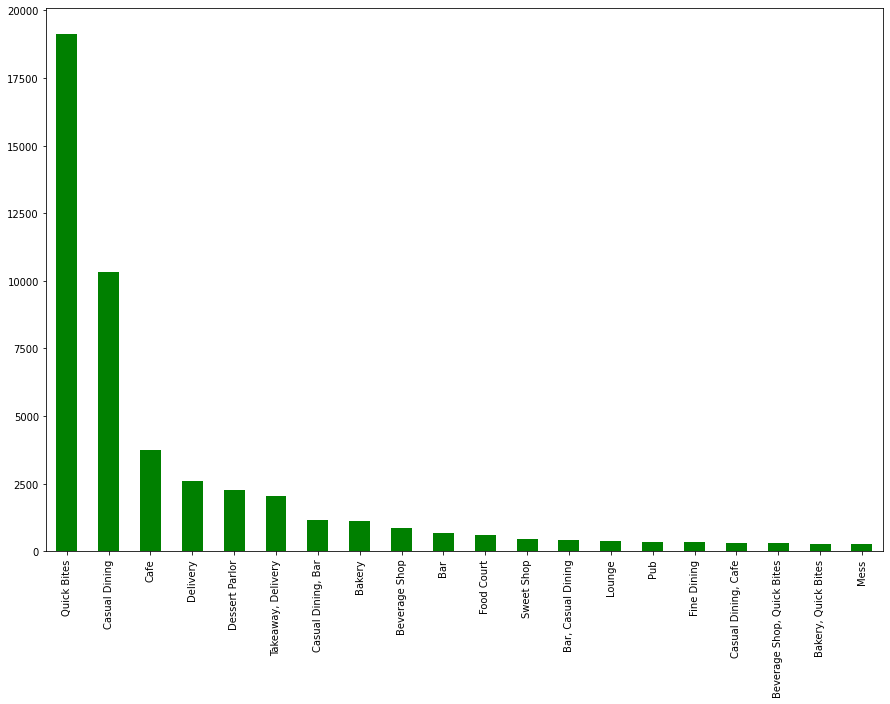

In [30]:
plt.figure(figsize = (15,10))
df['rest_type'].value_counts().nlargest(20).plot.bar(color = 'green')

# Top 2 Resturant Analaysis

In [31]:
def mark(x):
  if x in ('Quick Bites' , 'Casual Dining'):
    return 'Quick Bites + Casual Dining'
  else: 
    return 'others'  

In [32]:
df['Top_types'] = df['rest_type'].apply(mark)

In [33]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [34]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,others
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield,others
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield,others
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,others
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental",1500.0,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield,others


In [35]:
import plotly.express as px

In [36]:
values = df['Top_types'].value_counts().values

In [37]:
labels = df['Top_types'].value_counts().index

In [38]:
fig = px.pie(df , names=labels , values=values)
fig.show()

In [39]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [40]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

## Evaluting Top 5 Expensive  Resturant based on Voted , url , cost and rate columns
## Evaluting Top 5 Cheapest Resturant based on Voted , url , cost and rate columns

In [41]:
rest = df.groupby('name').agg({'votes':'sum' ,'url':'count' , 'approx_cost(for two people)':'mean' , 'rate':'mean'}).reset_index()
rest

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.400000
1,#L-81 Cafe,432,9,400.0,3.900000
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.700000
4,'Brahmins' Thatte Idli,0,1,100.0,NaN
...,...,...,...,...,...
8787,late100,0,5,200.0,NaN
8788,nu.tree,1443,8,400.0,4.314286
8789,re:cess - Hilton Bangalore Embassy GolfLinks,438,3,1200.0,4.100000
8790,repEAT Hub,0,2,200.0,NaN


In [42]:
rest.columns = ['name' , 'total_votes' , 'total_unities' , 'avg_approx_cost' , 'mean']
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [43]:
rest['votes_per_unity'] = rest['total_votes']/rest['total_unities']

In [44]:
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean,votes_per_unity
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [45]:
popular = rest.sort_values(by = 'total_unities' , ascending=False)
popular

,name,total_votes,total_unities,avg_approx_cost,mean,votes_per_unity
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [46]:
popular.shape

(8792, 6)

In [47]:
popular['name'].nunique()

8792

In [48]:
popular.sort_values(by = 'total_votes' ,ascending=False).query('total_votes > 0').head(5)

,name,total_votes,total_unities,avg_approx_cost,mean,votes_per_unity
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
8269,Truffles,301059,43,900.000000,4.595349,7001.372093
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
3054,Hammered,180602,47,1272.340426,4.329787,3842.595745
7751,The Black Pearl,172122,18,1427.777778,4.727778,9562.333333


Text(0.5, 1.0, 'Top 5 least voted resturant')

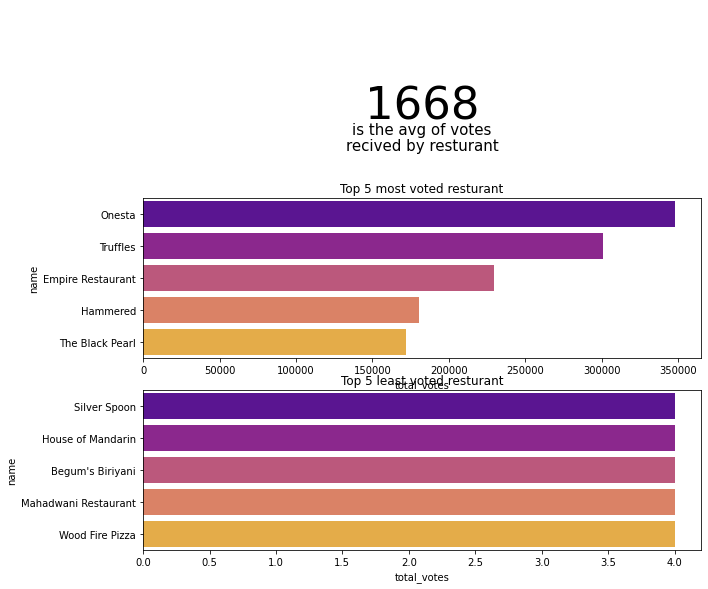

In [49]:
fig , (ax1 , ax2 , ax3) = plt.subplots(3,1 , figsize = (10,10))
ax1.text(0.50 , 0.30 , int(popular['total_votes'].mean()) , fontsize = 45 , ha ='center')
ax1.text(0.50 , 0.20 , 'is the avg of votes' , fontsize = 15 , ha ='center')
ax1.text(0.50 , 0.10 , 'recived by resturant' , fontsize = 15 , ha= 'center')
ax1.axis('off')

sns.barplot(x = 'total_votes' , y = 'name' , data = popular.sort_values(by = 'total_votes' ,ascending=False).query('total_votes > 0').head(5) , ax = ax2 , palette='plasma')
ax2.set_title('Top 5 most voted resturant')

sns.barplot(x = 'total_votes' , y = 'name' , data = popular.sort_values(by = 'total_votes' ,ascending=False).query('total_votes > 0').tail(5) , ax = ax3 , palette='plasma')
ax3.set_title('Top 5 least voted resturant')

Text(0.5, 1.0, 'Top 5 least cheapest resturant')

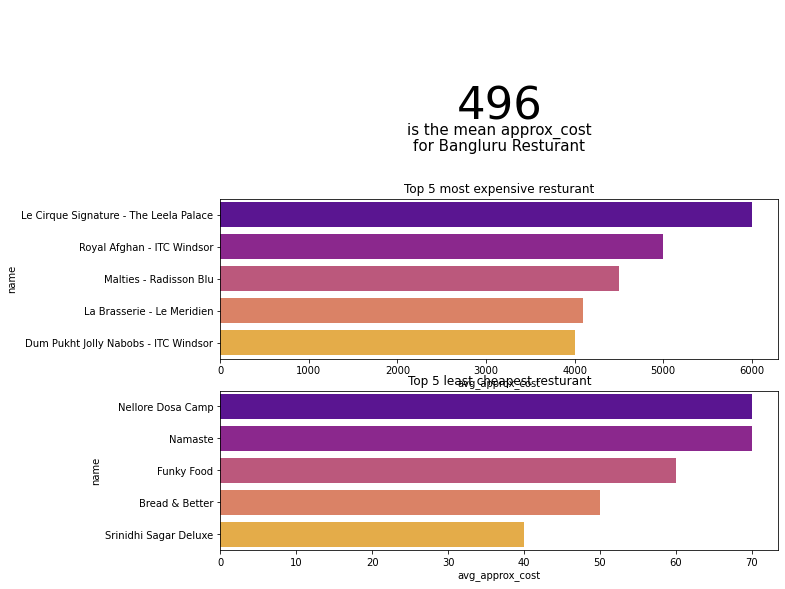

In [50]:
fig , (ax1 , ax2 , ax3) = plt.subplots(3,1 , figsize = (10,10))
ax1.text(0.50 , 0.30 , int(popular['avg_approx_cost'].mean()) , fontsize = 45 , ha ='center')
ax1.text(0.50 , 0.20 , 'is the mean approx_cost' , fontsize = 15 , ha ='center')
ax1.text(0.50 , 0.10 , 'for Bangluru Resturant' , fontsize = 15 , ha= 'center')
ax1.axis('off')

sns.barplot(x = 'avg_approx_cost' , y = 'name' , data = popular.sort_values(by = 'avg_approx_cost' ,ascending=False).query('avg_approx_cost > 0').head(5) , ax = ax2 , palette='plasma')
ax2.set_title('Top 5 most expensive resturant')

sns.barplot(x = 'avg_approx_cost' , y = 'name' , data = popular.sort_values(by = 'avg_approx_cost' ,ascending=False).query('avg_approx_cost > 0').tail(5) , ax = ax3 , palette='plasma')
ax3.set_title('Top 5 least cheapest resturant')

# Resurant give Booking Facilities or not

In [51]:
x = df['book_table'].value_counts()
labels = ['not book' , 'book']

In [52]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [53]:
trace = go.Pie(labels = labels , values = x , hoverinfo='label + percent' ,  textinfo='percent')
iplot([trace])

# Resturant give Online order Facilities

In [54]:
x = df['online_order'].value_counts()
labels = ['accepted' , 'not accepted']

In [55]:
fig = px.pie(df , values= x , names=labels , title = 'Pie Chart')
fig.show()

In [56]:
filter1 = (df['approx_cost(for two people)'] <= 400) & (df['location'] == 'BTM') & (df['rate'] >= 4) & (df['rest_type'] == 'Quick Bites')
budget = df[filter1]
budget.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
928,https://www.zomato.com/bangalore/hiyar-majhe-k...,"57/1, Near Alliance University, 19th Cross, 7t...",Hiyar Majhe Kolkata,Yes,No,4.0,244,+91 9108919806\r\r\n+91 9739059571,BTM,Quick Bites,"Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...","Bengali, North Indian",400.0,"[('Rated 4.0', 'RATED\n I like this restauran...",[],Delivery,Bannerghatta Road,Quick Bites + Casual Dining
934,https://www.zomato.com/bangalore/swadista-aaha...,"947, 16th Main Road, 2nd Stage, BTM, Bangalore",Swadista Aahar,Yes,No,4.1,775,+91 9844006825\r\r\n+91 9844615361,BTM,Quick Bites,"Panneer Butter Masala, Idli, Masala Dosa, Vada...","South Indian, North Indian, Chinese, Street Food",300.0,"[('Rated 3.0', ""RATED\n Ordered south Indian ...",[],Delivery,Bannerghatta Road,Quick Bites + Casual Dining
940,https://www.zomato.com/bangalore/swad-punjab-d...,"324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...",Swad Punjab Da,Yes,No,4.0,126,+91 8360151853,BTM,Quick Bites,"Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry",North Indian,150.0,"[('Rated 4.0', 'RATED\n If you can visit and ...","['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...",Delivery,Bannerghatta Road,Quick Bites + Casual Dining
942,https://www.zomato.com/bangalore/roti-wala-btm...,"688, 7th Main, 10th Cross Main Road, 2nd Stage...",Roti Wala,Yes,No,4.0,197,+91 9731100002,BTM,Quick Bites,"Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...",North Indian,300.0,"[('Rated 5.0', 'RATED\n Well, I never had a c...",[],Delivery,Bannerghatta Road,Quick Bites + Casual Dining
954,https://www.zomato.com/bangalore/litti-twist-b...,"No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...",Litti Twist,Yes,No,4.1,464,+91 8884270523,BTM,Quick Bites,"Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...","North Indian, Bihari",300.0,"[('Rated 4.0', ""RATED\n It's a great outlet t...",[],Delivery,Bannerghatta Road,Quick Bites + Casual Dining


In [57]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

# Select Resturant on the Basis of budget

In [58]:
def return_budget(location , resturant_type):
  filter1 = (df['approx_cost(for two people)'] <= 400) & (df['location'] == location) & (df['rate'] >= 4) & (df['rest_type'] == resturant_type)
  budget = df[filter1]
  return (budget['name'].unique())


In [59]:
return_budget('BTM' , 'Quick Bites')

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

# Geograohical Analysis

In [60]:
from geopy.geocoders import Nominatim

In [61]:
geolocator = Nominatim(user_agent = 'app')

In [62]:
data = df['name'][0]
data

'Jalsa'

In [63]:
data = geolocator.geocode(data)

In [64]:
data.latitude

12.9775851

In [65]:
data.longitude

77.6954241

In [66]:
df.shape

(51717, 18)

In [67]:
locations = pd.DataFrame({'Name' : df['location'].unique()})
locations

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
89,West Bangalore
90,Magadi Road
91,Yelahanka
92,Sahakara Nagar


# Create latitude and longitude

In [68]:
lat = []
lon = []

for location in locations['Name']:
  location = geolocator.geocode(location)
  if location is None:
    lat.append(np.nan)
    lon.append(np.nan)
  else:
    lat.append(location.latitude) 
    lon.append(location.longitude) 


In [69]:
locations['latitude'] = lat
locations['longitude'] = lon

In [70]:
locations.head()

,Name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,12.941726,77.575502
2,Mysore Road,12.387214,76.666963
3,Jayanagar,27.643927,83.052805
4,Kumaraswamy Layout,12.908149,77.555318


In [71]:
Rest_locations = df['location'].value_counts().reset_index()

In [72]:
Rest_locations.columns = ['Name' , 'count']
Rest_locations

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [73]:
Resturant_locations = Rest_locations.merge(locations , on = 'Name').dropna()
Resturant_locations 

,Name,count,latitude,longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,18.147500,41.538889
2,Koramangala 5th Block,2504,12.934377,77.628415
3,JP Nagar,2235,12.265594,76.646540
4,Whitefield,2144,44.373058,-71.611858
...,...,...,...,...
88,West Bangalore,6,12.875938,77.596100
89,Yelahanka,6,13.100698,77.596345
90,Jakkur,3,13.078474,77.606894
91,Rajarajeshwari Nagar,2,12.927441,77.515522


In [74]:
import folium
from folium.plugins import HeatMap

In [75]:
base_map = folium.Map(location= [12.97 , 77.59])
base_map

In [76]:
from wordcloud import WordCloud , STOPWORDS

In [77]:
data = df[df['rest_type'] == 'Quick Bites']
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites + Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites + Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites + Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites + Casual Dining


In [78]:
data['dish_liked'][3].split()

['Masala', 'Dosa']

In [79]:
data['dish_liked'].isnull().sum()

13843

In [80]:
dishes = ''

for word in data['dish_liked'].dropna():
  words = word.split()
  for i in range(len(words)):
    words[i] = words[i].lower()
  dishes = dishes + ' '.join(words) + ' ' 

In [81]:
dishes

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

# Word Cloud Customer Like Dishes

In [82]:
stopwords = set(STOPWORDS)

In [83]:
wordcloud = WordCloud(stopwords = stopwords , width = 1500 , height = 1500).generate(dishes)

(-0.5, 1499.5, 1499.5, -0.5)

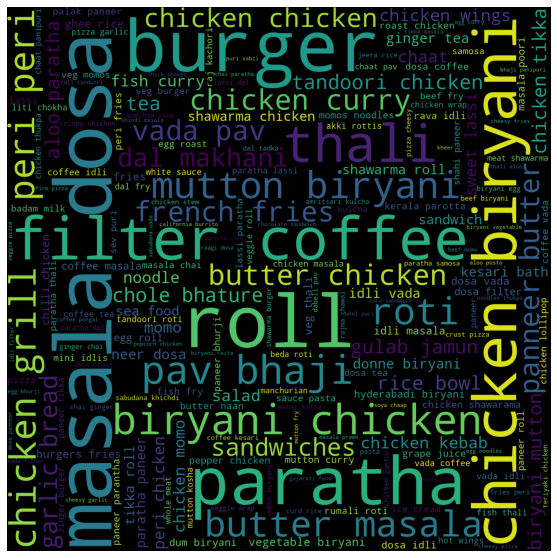

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

In [85]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [86]:
data = df['reviews_list'][0]
data

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [87]:
data = data.lower()

In [88]:
import re

In [89]:
data2 = re.sub('[^a-zA-Z]' , ' ' , data)
data2

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [90]:
data3 = re.sub('rated' , ' ' , data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [91]:
data4 = re.sub('x' , '  ' , data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [92]:
data5 = re.sub(' +' , ' ' , data4)
data5

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

In [93]:
dataset = df[df['rest_type'] == 'Quick Bites']
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites + Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites + Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites + Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites + Casual Dining


# Word Cloud On Basis of Customer review

In [94]:
total_review = ' '

for review in dataset['reviews_list']:
  review = review.lower()
  review = re.sub('[^a-zA-Z]' , ' ' , review)
  review = re.sub('rated' , ' ' , review)
  review = re.sub('x' , '  ' , review)
  review = re.sub(' +' , ' ' , review)
  total_review = total_review + str(review)


In [95]:
wordcloud2 = WordCloud(stopwords = stopwords , width = 1500 , height = 1500).generate(review)

(-0.5, 1499.5, 1499.5, -0.5)

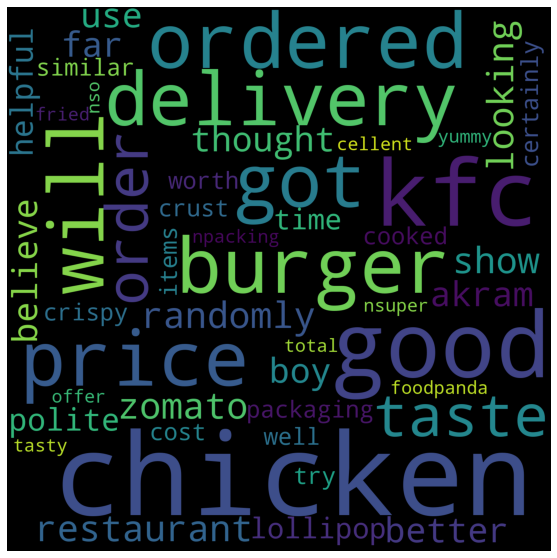

In [96]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis('off')

In [97]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [98]:
def assign(x):
  if x>0:
    return 1
  else:
    return 0  

In [99]:
df['rated']  = df['rate'].apply(assign)

In [100]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [101]:
df['rated'].unique()

array([1, 0])

In [102]:
new_resturant = df[df['rated'] == 0]
train_val_resturant = df.query('rated==1')

In [103]:
train_val_resturant.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1


In [104]:
train_val_resturant['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

# Define Our Target Variable

In [105]:
thresuld_value = 3.75
train_val_resturant['target'] = train_val_resturant['rate'].apply(lambda x:1 if x>= thresuld_value else 0)

In [106]:
train_val_resturant.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


In [107]:
X = train_val_resturant['target'].value_counts()
X

0    21421
1    20244
Name: target, dtype: int64

In [108]:
labels = X.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x7f5295a67910>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

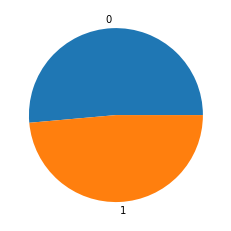

In [109]:
plt.pie(X , labels=labels)

In [110]:
train_val_resturant.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [111]:
train_val_resturant.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


In [112]:
len(train_val_resturant['cuisines'][0].split(','))

3

In [113]:
def count(x):
  return len(x.split(','))

In [114]:
train_val_resturant['cuisines'].isnull().sum()

11

In [115]:
train_val_resturant['total_cuisines'] = train_val_resturant['cuisines'].astype(str).apply(count)

In [116]:
train_val_resturant.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target,total_cuisines
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1,3
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,2


In [117]:
train_val_resturant['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [118]:
train_val_resturant['multiple_types'] = train_val_resturant['rest_type'].astype(str).apply(count)

In [119]:
train_val_resturant.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target,total_cuisines,multiple_types
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,others,1,0,2,2
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,others,1,0,4,2
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,others,1,0,1,1
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,others,1,1,1,1
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental",1500.0,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield,others,1,0,3,2


In [120]:
train_val_resturant.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

# Best Feature Selection After Discuss  our Domain Expert

In [121]:
imp_feature = [ 'online_order', 'book_table',
        'location', 'rest_type',
       'approx_cost(for two people)', 
       'listed_in(type)', 'listed_in(city)' , 'target',
       'multiple_types', 'total_cuisines']

In [122]:
data = train_val_resturant[imp_feature]

In [123]:
data.shape

(41665, 10)

In [124]:
data.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,multiple_types,total_cuisines
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,3
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,3
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,2,3
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,1,2
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,1,2


In [125]:
data.shape

(41665, 10)

In [126]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
multiple_types                   0
total_cuisines                   0
dtype: int64

In [127]:
data.dropna(how = 'any' , inplace = True)

In [128]:
data.shape

(41271, 10)

In [129]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
multiple_types                   int64
total_cuisines                   int64
dtype: object

# Seprate Categorical and numerical columns

In [130]:
cat_feature = [col for col in data.columns if data[col].dtype == 'O']
cat_feature

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [131]:
num_feature = [col for col in data.columns if data[col].dtype != 'O']
num_feature

['approx_cost(for two people)', 'target', 'multiple_types', 'total_cuisines']

In [132]:
for feature in cat_feature:
  print('{} has total {} unique features'.format(feature , data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [133]:
data[cat_feature].head()

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining",Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari


In [134]:
data['location'].nunique()

92

In [135]:
values = (data['location'].value_counts()/len(data))*100
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Peenya                   0.002423
Nagarbhavi               0.002423
Name: location, Length: 92, dtype: float64

# Feature Selection

In [136]:
threshold = 0.4

imp = values[values > threshold]
imp

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [137]:
imp.nunique()

45

In [138]:
data['location'].nunique()

92

In [139]:
data['location'].apply(lambda x:'other' if x not in imp.index else x)

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Basavanagudi
             ...     
51709      Whitefield
51711      Whitefield
51712      Whitefield
51715           other
51716           other
Name: location, Length: 41271, dtype: object

In [140]:
data['location'] = np.where(data['location'].isin(imp.index) , data['location'] , 'other')

In [141]:
data['location'].nunique()

47

In [142]:
values2 = (data['rest_type'].value_counts()/len(data))*100
values2

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Cafe, Food Court               0.004846
Quick Bites, Kiosk             0.002423
Bakery, Beverage Shop          0.002423
Name: rest_type, Length: 87, dtype: float64

In [143]:
threshold = 1.5

imp2 = values2[values2 > threshold]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [144]:
len(imp2)

10

In [145]:
data['rest_type'].head(20)

0           Casual Dining
1           Casual Dining
2     Cafe, Casual Dining
3             Quick Bites
4           Casual Dining
5           Casual Dining
6           Casual Dining
7     Casual Dining, Cafe
8                    Cafe
9                    Cafe
10                   Cafe
11                   Cafe
12                   Cafe
13                   Cafe
14    Cafe, Casual Dining
15                   Cafe
16                   Cafe
17                   Cafe
18                   Cafe
19                   Cafe
Name: rest_type, dtype: object

In [146]:
data['rest_type'] = np.where(data['rest_type'].isin(imp2.index) , data['rest_type'] , 'other')

In [147]:
data['rest_type'].head(20)

0     Casual Dining
1     Casual Dining
2             other
3       Quick Bites
4     Casual Dining
5     Casual Dining
6     Casual Dining
7             other
8              Cafe
9              Cafe
10             Cafe
11             Cafe
12             Cafe
13             Cafe
14            other
15             Cafe
16             Cafe
17             Cafe
18             Cafe
19             Cafe
Name: rest_type, dtype: object

In [148]:
for feature in cat_feature:
  print('{} has total {} unique features'.format(feature , data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [149]:
data_cat = data[cat_feature]

# One hot encoding

In [150]:
for col in cat_feature:
  col_encoded = pd.get_dummies(data_cat[col] , prefix=col , drop_first=True)
  data_cat = pd.concat([data_cat , col_encoded] , axis=1)
  data_cat.drop(col , axis =1 , inplace=True)

In [151]:
data_cat.shape

(41271, 93)

In [152]:
data_cat.head()

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,location_Commercial Street,location_Cunningham Road,location_Domlur,location_Ejipura,location_Electronic City,location_Frazer Town,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Jeevan Bhima Nagar,location_Kalyan Nagar,location_Kammanahalli,location_Koramangala 1st Block,location_Koramangala 3rd Block,location_Koramangala 4th Block,location_Koramangala 5th Block,location_Koramangala 6th Block,location_Koramangala 7th Block,location_Koramangala 8th Block,location_Lavelle Road,location_MG Road,location_Malleshwaram,location_Marathahalli,location_New BEL Road,location_Old Airport Road,location_Rajajinagar,location_Residency Road,location_Richmond Road,location_Sarjapur Road,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_Banashankari,listed_in(city)_Bannerghatta Road,listed_in(city)_Basavanagudi,listed_in(city)_Bellandur,listed_in(city)_Brigade Road,listed_in(city)_Brookefield,listed_in(city)_Church Street,listed_in(city)_Electronic City,listed_in(city)_Frazer Town,listed_in(city)_HSR,listed_in(city)_Indiranagar,listed_in(city)_JP Nagar,listed_in(city)_Jayanagar,listed_in(city)_Kalyan Nagar,listed_in(city)_Kammanahalli,listed_in(city)_Koramangala 4th Block,listed_in(city)_Koramangala 5th Block,listed_in(city)_Koramangala 6th Block,listed_in(city)_Koramangala 7th Block,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
num_feature

['approx_cost(for two people)', 'target', 'multiple_types', 'total_cuisines']

In [154]:
data.columns

Index(['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'multiple_types', 'total_cuisines'],
      dtype='object')

# After all feature selection, label encoding, one hot encoding we concat our data

In [155]:
data_final = pd.concat([data.loc[: , ['approx_cost(for two people)', 'target', 'multiple_types', 'total_cuisines']] , data_cat] , axis =1 )

In [156]:
data_final.head()

,approx_cost(for two people),target,multiple_types,total_cuisines,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,location_Commercial Street,location_Cunningham Road,location_Domlur,location_Ejipura,location_Electronic City,location_Frazer Town,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Jeevan Bhima Nagar,location_Kalyan Nagar,location_Kammanahalli,location_Koramangala 1st Block,location_Koramangala 3rd Block,location_Koramangala 4th Block,location_Koramangala 5th Block,location_Koramangala 6th Block,location_Koramangala 7th Block,location_Koramangala 8th Block,location_Lavelle Road,location_MG Road,location_Malleshwaram,location_Marathahalli,location_New BEL Road,location_Old Airport Road,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_Banashankari,listed_in(city)_Bannerghatta Road,listed_in(city)_Basavanagudi,listed_in(city)_Bellandur,listed_in(city)_Brigade Road,listed_in(city)_Brookefield,listed_in(city)_Church Street,listed_in(city)_Electronic City,listed_in(city)_Frazer Town,listed_in(city)_HSR,listed_in(city)_Indiranagar,listed_in(city)_JP Nagar,listed_in(city)_Jayanagar,listed_in(city)_Kalyan Nagar,listed_in(city)_Kammanahalli,listed_in(city)_Koramangala 4th Block,listed_in(city)_Koramangala 5th Block,listed_in(city)_Koramangala 6th Block,listed_in(city)_Koramangala 7th Block,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,800.0,1,1,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,800.0,1,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,800.0,1,2,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,300.0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,600.0,1,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split Data into train and test

In [157]:
X = data_final.drop('target' , axis=1)
y = data_final['target']

In [158]:
from sklearn.model_selection  import train_test_split

In [159]:
data_final.shape

(41271, 97)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42)

In [161]:
X_train.shape

(33016, 96)

## Random Forest Classifier model

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
model = RandomForestClassifier()

In [164]:
model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
pred = model.predict(X_test)

In [166]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [167]:
confusion_matrix(pred , y_test)

array([[3502,  944],
       [ 750, 3059]])

In [168]:
accuracy_score(pred , y_test)

0.7947910357359176

## Gassian Navie bayes
## Logistics Regression
## KNN Classifier
## Decision Classifier
## XGB Classifier

In [169]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [170]:
models = []

models.append(('LogisticsRegression' , LogisticRegression()))
models.append(('Naive Bayes' , GaussianNB()))
models.append(('RandomForest' , RandomForestClassifier()))
models.append(('Decision Tree' , DecisionTreeClassifier()))
models.append(('KNN' , KNeighborsClassifier()))

In [171]:
for name , model in models:
  print(name)
  print(model)

LogisticsRegression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Naive Bayes
GaussianNB(priors=None, var_smoothing=1e-09)
RandomForest
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Decision Tree
DecisionTreeClassifier(

In [172]:
for name , model in models:
  print(name)
  model.fit(X_train , y_train)
  pred = model.predict(X_test)
  cm = confusion_matrix(y_test , pred)
  print(cm)
  acc = accuracy_score(y_test ,pred)
  print(acc)
  print('\n')

LogisticsRegression
[[3451  801]
 [1509 2494]]
0.7201695941853422


Naive Bayes
[[3040 1212]
 [1460 2543]]
0.6763173834039976


RandomForest
[[3520  732]
 [ 953 3050]]
0.7958812840702605


Decision Tree
[[3648  604]
 [ 812 3191]]
0.8284675953967292


KNN
[[3625  627]
 [1003 3000]]
0.8025439127801333


